<a href="https://colab.research.google.com/github/annine1/Quiz-StageA/blob/main/Hamoye_Stage_C_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <center> Machine Learning Classification
### <center> **ID: 147c5bd2f901f000**



### Importing rquired libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
np.random.seed(1)

### Loading data

In [34]:
path = '/content/drive/MyDrive/Internship/Homoye/Stage c/dataset/Data_for_UCI_named.csv'
df = pd.read_csv(path)

In [35]:
# print the first five rows
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [36]:
# df shape
df.shape

(10000, 14)

In [100]:
# drop stab column
'''Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 
'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).'''
data = df.drop(columns='stab')
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [101]:
# data shape
data.shape

(10000, 13)

In [102]:
# check distribution of stabf variable
data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

The data target are umbalanced.

In [103]:
# check missing values
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

There is not missing values

### Balance the data

In [105]:
data_stable = data[data['stabf']=='stable']
data_unstable = data[data['stabf']=='unstable'].sample(4500)
data_df = data_stable.append(data_unstable)
data_df['stabf'].value_counts()

unstable    4500
stable      3620
Name: stabf, dtype: int64

In [106]:
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,stable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,stable
10,5.930110,6.730873,6.245138,0.533288,2.327092,-0.702501,-1.116920,-0.507671,0.239816,0.563110,0.164461,0.753701,stable
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,-1.280581,-0.986816,0.899698,0.866546,0.303921,0.077610,stable


In [107]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop=True)
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,7.231598,0.821405,5.948496,4.818410,4.337054,-1.149494,-1.696738,-1.490822,0.255591,0.374161,0.391151,0.641752,stable
1,4.560499,0.564389,1.048115,5.078879,3.487890,-1.093587,-0.779287,-1.615016,0.649354,0.474423,0.092314,0.149460,stable
2,1.056394,5.409214,8.893385,7.370882,3.559968,-1.824743,-0.593205,-1.142021,0.239080,0.058007,0.165326,0.792772,stable
3,5.957227,4.346978,8.286207,9.732339,2.152419,-0.527892,-0.560748,-1.063780,0.891266,0.858518,0.308177,0.440459,unstable
4,3.898923,6.908035,2.668062,9.716076,2.322758,-0.536508,-0.638910,-1.147340,0.411028,0.324234,0.524948,0.484173,stable


### Extract features and target

In [108]:
X = data_df.drop(columns='stabf')
y = data_df['stabf']

### Split the data into training and testing set

In [109]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state =1)

# print(y_train.value_counts())

In [110]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6496, 12), (1624, 12), (6496,), (1624,))

### Scale the data using Standard scaler

In [111]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
x_train_balanced,y_train_balanced = smote.fit_resample(X_train, y_train)


In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_balanced)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train_balanced.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


### **Question 1** : Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?
**EXTRA TREE CLASSIFIER**

In [86]:
# Building the model
extra_tree_forest = ExtraTreesClassifier()
  
# Training the model
extra_tree_forest.fit(X_train_scaled, y_train_balanced)

# making prediction
y_ETC = extra_tree_forest.predict(X_test_scaled)


# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

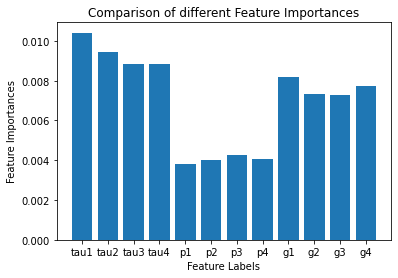

In [87]:
import matplotlib.pyplot as plt

# Plotting a Bar Graph to compare the models
plt.bar(X_test_scaled.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

The features with the most and least important are **tau1** and **p1**, respectively.

### **Question 4** : the accuracy on the test set using the LGBM classifier in 4 decimal places.
**Light Gradient Boosting Model (LGBM)**


In [116]:
# Creating an object for model and fitting it on training data set
model = LGBMClassifier()
model.fit(X_train_scaled, y_train_balanced)
 
# Predicting the Target variable
y_pred_LGBM = model.predict(X_test_scaled)
print(y_pred_LGBM)
# score
accuracy = model.score(X_test_scaled, y_test)
# print(accuracy)
# using metrics module for accuracy calculation
acc_score = accuracy_score(y_test, y_pred_LGBM)
print('The accuracy is: ', round(acc_score,4))

['unstable' 'unstable' 'stable' ... 'unstable' 'stable' 'stable']
The accuracy is:  0.9421


### **Question 7**: the best hyperparameters from the randomized search CV

In [83]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV

In [94]:
grid = {'n_estimators': sp_randint(250, 500), 'min_samples_leaf' : sp_randint(0, 12),
            'max_features' : sp_randint(0, 50), 'min_samples_split':sp_randint(0,100)}

clf_rfc = RandomizedSearchCV(extra_tree_forest, n_jobs=-1, n_iter=10, verbose=1, param_distributions=grid,
                                 scoring='accuracy', cv=5, random_state=1)

clf_rfc.fit(X_train_scaled,y_train_balanced)
# y_hat = predict(X_test_scaled)

print('Best Params: \n', clf_rfc.best_params_ )

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

Best Params: 
 {'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 25, 'n_estimators': 428}


### **Question 8** :The accuracy on the test set using the random forest classifier, in 4 decimal places.
Random Forest Classifier

In [113]:
# creating a RF classifier
clf = RandomForestClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_scaled, y_train_balanced)
 
# performing predictions on the test dataset
y_pred_RF = clf.predict(X_test_scaled)
 
# metrics are used to find accuracy or error
# from sklearn import metrics 
# print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", round(accuracy_score(y_test, y_pred_RF), 4))

ACCURACY OF THE MODEL:  0.9236


### **Question 9**: What other hyperparameter optimization method can you try apart from Random Search?

- **Grid Search cv**

### **Question 11**:
Based on the matrix, the number predicted with the least accuracy is 8.

### **Question 12**:


In [119]:
precision = 255/(255+1380)
recall=255/(255+45)
f1_score = 2*precision*recall/(precision + recall)
print('The F1 score of this classifier is :',round(f1_score,4))

The F1 score of this classifier is : 0.2636


### **Question 16**:
The following metric is generally NOT useful for a classification problem: **RMSE Value**

### **Question 18**: the accuracy on the test set using the **XGboost classifier** in 4 decimal places:


In [122]:
# define the model
xgb = XGBClassifier()
# fit the model on the whole dataset
xgb.fit(X_train_scaled, y_train_balanced)
# making prediction
y_pred_xgb = xgb.predict(X_test_scaled)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
acc_score = accuracy_score(y_test, y_pred_xgb)
print('The accuracy is: ',round(acc_score, 4))

The accuracy is:  0.9193
